# 2020-10-22

## Correlating Rpb1 and Zld with histone signal

This is copied from my lab notebook:

The first significant observation is that the two proteins behave roughly opposite vis-a-vis histone. Zelda is conspicuously enriched on condensed chromatin in prophase, while Rpb1 is conspicuously excluded from condensing chromatin. The effect is striking and obvious. After nuclear division, Zelda returns to the nucleus first. I'll need to take some uniform datasets in the future (same frame interval, etc.), but it seems clear that a significant amount of Zelda is detectable on chromatin at about 70-80s post division (marked from the start of chromosome separation) whereas Rpb1 doesn't show up significantly in the nucleus until about 110 s. I see the same thing by trying to match nuclear morphology (degree of rounding, etc.) and see that Zelda accumulates to a higher level faster than Rpb1, probably leading it by around 30 seconds. When Rpb1 enters, it strikingly fills the "holes" in the histone signal--presumably regions of low chromatin concentration into which the chromosomes have simply not yet spread. Rpb1 is plainly not entirely limited to these regions, as weak signal is detectable in regions with strong histone signal. Zelda shows the opposite behavior: in the very early moments, it is obviously enriched on dense chromatin regions and (relatively) excluded from the histone "holes". My impression is that the associations (positive and negative) are stronger for Rpb1. Zelda is plainly enriched in dense chromatin areas and depleted from low-chromatin regions, but the effect is imprecise and there are many exceptions. Rpb1 maps pretty strongly (inversely) with the histone signal. Zelda is also blobby from the start, whereas Rpb1 shows no such blobs. 

Something else I wanted to look at was the relationship between these proteins and the histone structure that emerges in nc14. The principal comparison here was movie 06 for Rpb1 and 09 for Zld. The data quality for Zelda is lower (I think it's just faster scan conditions), but I can see the histone channel forming into faint blobs in both datasets. For Rpb1, it's quite striking that the foci almost exclusively happen in low-histone regions (comparable to the histone holes after division, but much weaker). This is consistent with a polytene picture, where pol2 stains the decompacted regions. My gut is that the structure we are seeing in the histone channel is TADs, and the high-histone regions are the large, dense, gene-poor TADs and all the little TADs (inter-TADs at low resolution) are the low-histone regions. Zelda is a different story. My impression is that Zelda in nc14 is also enriched in low-histone areas, but only very weakly. It's nothing like Rpb1.

This is a cool phenomenon, and would be worth quantifying. I'd like to look at are the correlation of histone and protein (rpb1/zelda) signal over time, starting from a division. A really cool result would be if Zelda starts positively correlated with histone density and moves to negative, kind of "watching Zelda open the chromatin". I'd also love to make a movie graph, so it's a good chance to learn that. I think I just need a nuclear mask (easy because histone!) and then do the straight pixel-wise correlation of nuclear pixels. I think plotting the correlation (scatter) as a movie would be cool, though it may be a problem if there are  lots of points…

In [1]:
# Import public packages.
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import ndimage as ndi 
from importlib import reload
import pickle
import czifile
%matplotlib inline

# Import my packages.
import sys
sys.path.append('/Users/michaelstadler/Bioinformatics/Projects/rpb1/bin')
import imagep as imp
reload(imp)
from imagep import viewer, save_pickle, load_pickle, box_spots, read_czi

In [2]:
zld2 = read_czi('/Users/michaelstadler/Bioinformatics/Projects/rpb1/data/mNeonGreen_Zld_HisRFP_em1-02.czi')

In [5]:
viewer(zld2,8)

interactive(children=(Dropdown(description='Color', index=4, options=('Reds', 'magma', 'cividis', 'gray', 'Gre…

## 1. Make nuclear mask

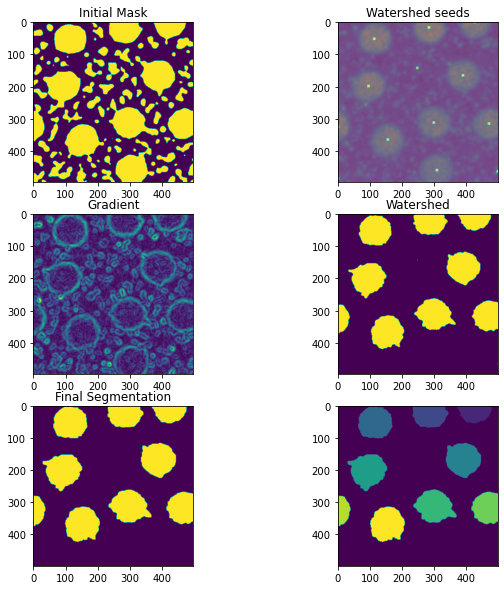

In [62]:
reload(imp)
seed_window=(150,150)
size_min=500
mask = imp.segment_nuclei3D_monolayer(zld2[0,23], seed_window=seed_window, size_min=size_min, display=True)
plt.imshow(mask[0])

In [69]:
reload(imp)
mask = imp.segment_nuclei_4dstack(zld2[0], imp.segment_nuclei3D_monolayer, seed_window=seed_window, size_min=size_min)

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 


In [61]:
viewer(mask, 6)

interactive(children=(Dropdown(description='Color', index=2, options=('cividis', 'gray', 'Greens', 'plasma', '…

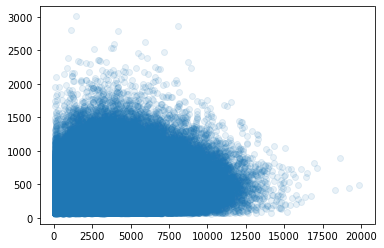

In [73]:
data=zld2
f=20
plt.scatter(data[0,f][mask[f].astype('bool')], data[1,f][mask[f].astype('bool')], alpha=0.1)

In [75]:
# Needs to be 3D segmentation

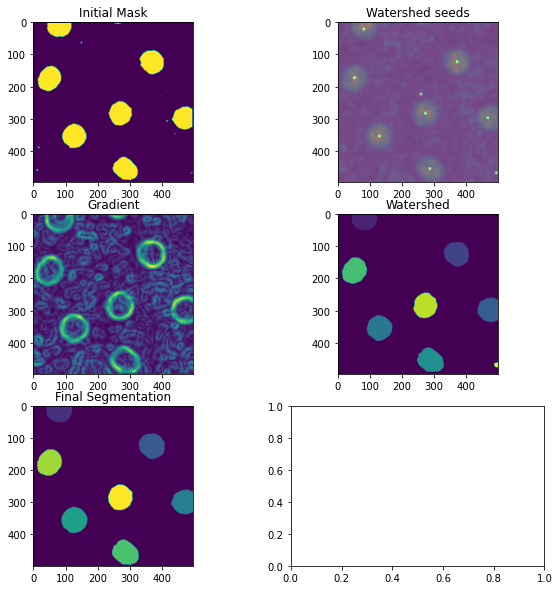

In [103]:
reload(imp)
seed_window=(20,250,250)
size_min=3000
mask = imp.segment_nuclei3D_5(zld2[0,12], seed_window=seed_window, size_min=size_min, display=True)
#viewer(mask)

In [16]:
reload(imp)
seed_window=(20,250,250)
size_min=3000
size_max=50000
mask = imp.segment_nuclei_4dstack(zld2[0], imp.segment_nuclei3D_5, seed_window=seed_window, size_min=size_min, size_max=size_max)

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 


In [105]:
viewer(mask,6)

interactive(children=(Dropdown(description='Color', index=2, options=('cividis', 'gray', 'Greens', 'plasma', '…

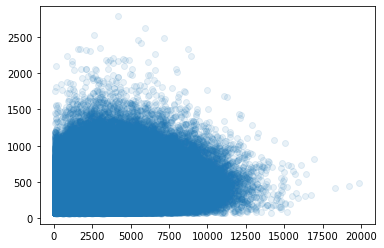

In [106]:
data=zld2
f=20
plt.scatter(data[0,f][mask[f].astype('bool')], data[1,f][mask[f].astype('bool')], alpha=0.1)

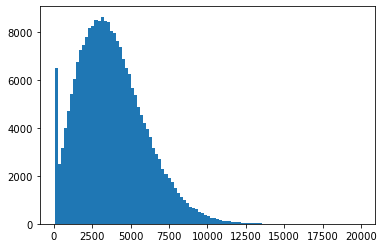

In [122]:
plt.hist(data[0,f][mask[f].astype('bool')], bins=100);

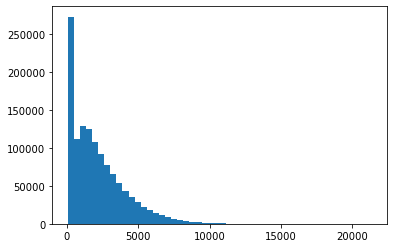

In [115]:
plt.hist(data[0,f].flatten(), bins=50);

In [117]:
np.mean(data[0,f][mask[f].astype('bool')])

3775.0455094852946

In [118]:
viewer(np.where(mask[f], data[0,f], 0),6)

interactive(children=(Dropdown(description='Color', index=2, options=('cividis', 'gray', 'Greens', 'plasma', '…

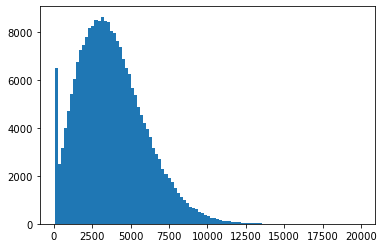

In [125]:
a= np.where(mask[f], data[0,f], 0)
b = a[a>0]
c = data[0,f][a==0]
plt.hist(b, bins=100);
#plt.hist(c, bins=100);

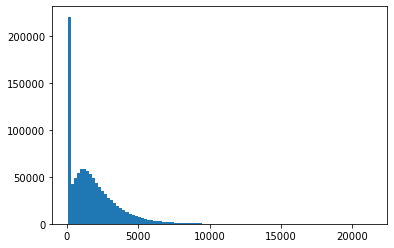

In [128]:
plt.hist(c, bins=100);

In [134]:
np.count_nonzero(data[0,f] <  600)

297699

In [136]:
viewer(zld2,4)

interactive(children=(Dropdown(description='Color', index=2, options=('cividis', 'gray', 'Greens', 'plasma', '…

In [145]:
data=zld2
f=9
plt.scatter(data[0,f][mask[f]], data[1,f][mask[f]], alpha=0.005)

KeyboardInterrupt: 

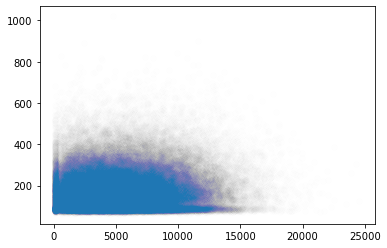

In [152]:
data=zld2
f=0
plt.scatter(data[0,f][mask[f].astype('bool')], data[1,f][mask[f].astype('bool')], alpha=0.005)

In [153]:
viewer(mask[f].astype('bool'))

interactive(children=(Dropdown(description='Color', index=2, options=('cividis', 'gray', 'Greens', 'plasma', '…

In [40]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
plt.style.use('seaborn-pastel')

def animscat(data, mask, samplesize, xlim, ylim, filename, alpha=0.5):

    fig = plt.figure()
    ax = plt.axes(xlim=(0, xlim), ylim=(0, ylim))
    scat = ax.scatter([], [], alpha=alpha)

    def animate(i):
        x = np.random.choice(data[0,i][mask[i].astype('bool')], samplesize)
        y = np.random.choice(data[1,i][mask[i].astype('bool')], samplesize)
        scat.set_offsets(np.c_[x, y])

    anim = FuncAnimation(fig, animate, interval=100, frames=range(0,data.shape[1]), repeat=True)


    anim.save(filename, writer='pillow')

In [25]:
data.shape

(2, 28, 5, 498, 498)

In [35]:
rpb03 = read_czi('/Users/michaelstadler/Bioinformatics/Projects/rpb1/data/20201021-rpb1-hisrfp-em2-zsmv-03.czi')
rpb03 = rpb03[:,30:]

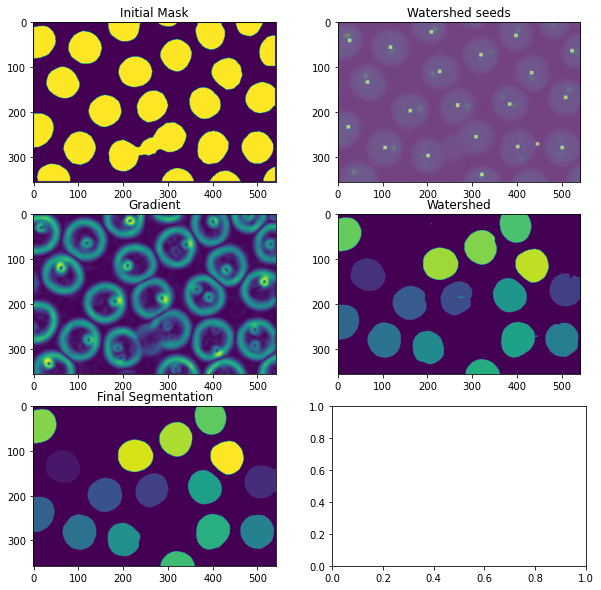

In [46]:
reload(imp)
seed_window=(20,100,100)
size_min=3000
mask = imp.segment_nuclei3D_5(rpb03[0,12], seed_window=seed_window, size_min=size_min, display=True)
#viewer(mask)

In [47]:
reload(imp)
seed_window=(20,100,100)
size_min=3000
size_max=50000
mask = imp.segment_nuclei_4dstack(rpb03[0], imp.segment_nuclei3D_5, seed_window=seed_window, size_min=size_min, size_max=size_max)

1 2 3 4 5 6 7 8 9 10 11 12 13 14 


In [48]:
viewer([rpb03[1], mask *1000], 6)

interactive(children=(Dropdown(description='Color', index=6, options=('prism', 'gray_r', 'plasma', 'inferno', …

In [49]:
mask_rpb03 = mask.copy()

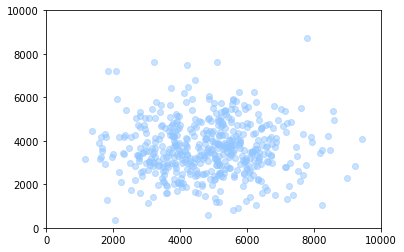

In [50]:
animscat(rpb03, mask_rpb03, 500, 1e4, 1e4, 'test2.gif')

In [51]:
viewer(rpb03)

interactive(children=(Dropdown(description='Color', index=6, options=('prism', 'gray_r', 'plasma', 'inferno', …

In [54]:
rpb06 = read_czi('/Users/michaelstadler/Bioinformatics/Projects/rpb1/data/20201021-rpb1-hisrfp-em2-zsmv-06.czi')
rpb06 = rpb06[:,0:20]

interactive(children=(Dropdown(description='Color', index=6, options=('prism', 'gray_r', 'plasma', 'inferno', …

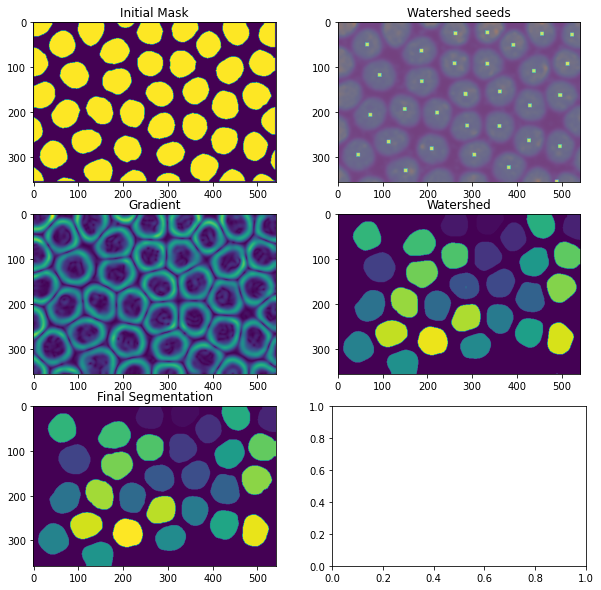

In [60]:
reload(imp)
seed_window=(20,100,100)
size_min=3000
size_max=50000
mask = imp.segment_nuclei3D_5(rpb06[1,12], seed_window=seed_window, size_min=size_min, display=True)
#viewer(mask)

In [61]:
mask_rpb06 = imp.segment_nuclei_4dstack(rpb06[1], imp.segment_nuclei3D_5, seed_window=seed_window, size_min=size_min, size_max=size_max)

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 


In [62]:
viewer(mask_rpb06)

interactive(children=(Dropdown(description='Color', index=6, options=('prism', 'gray_r', 'plasma', 'inferno', …

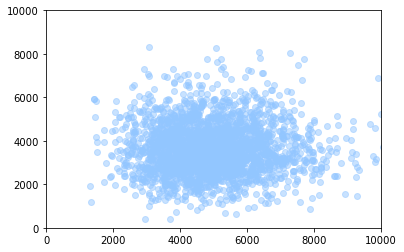

In [64]:
animscat(rpb06, mask_rpb06, 2500, 1e4, 1e4, 'rpb1-06.gif')

In [75]:
def pltscat(indata, mask, f, samplesize=5000, alpha=0.5):
    data = ndi.gaussian_filter(indata, sigma=0.5)
    x = np.random.choice(data[0,f][mask[f].astype('bool')], samplesize)
    y = np.random.choice(data[1,f][mask[f].astype('bool')], samplesize)
    plt.scatter(x, y, alpha=alpha)

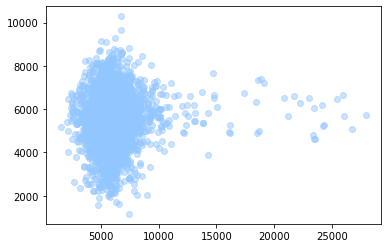

In [76]:
pltscat(rpb06, mask_rpb06, 1)

In [74]:
viewer([rpb06, ndi.gaussian_filter(rpb06, sigma=0.5)],6)

interactive(children=(Dropdown(description='Color', index=6, options=('prism', 'gray_r', 'plasma', 'inferno', …

I think this is being confounded by the HLB and heterochromatin. Restricting to the higher slices might be useful...

In [78]:
def pltscat(indata, mask, f, s, samplesize=5000, alpha=0.5):
    data = ndi.gaussian_filter(indata, sigma=0.5)
    x = np.random.choice(data[0,f,s][mask[f,s].astype('bool')], samplesize)
    y = np.random.choice(data[1,f,s][mask[f,s].astype('bool')], samplesize)
    plt.scatter(x, y, alpha=alpha)

In [352]:
pltscat(rpb06, mask_rpb06, 0,4, 5000, 0.4)

TypeError: pltscat() takes from 3 to 5 positional arguments but 6 were given

In [88]:
test = np.where(mask_rpb06 > 0, rpb06[0], 0)

In [89]:
viewer(test)

interactive(children=(Dropdown(description='Color', index=6, options=('prism', 'gray_r', 'plasma', 'inferno', …

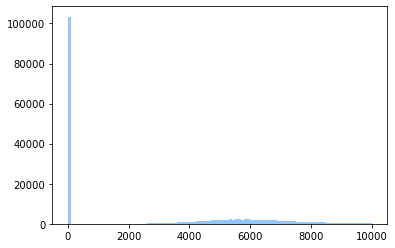

In [94]:
plt.hist(test[0,0].flatten(), bins=100,range=(0,1e4));

In [95]:
test = np.where(mask_rpb06 > 0, rpb06[0], 0)

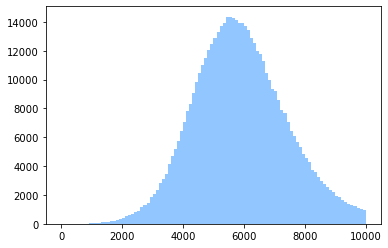

In [99]:
test2 = rpb06[0,0][mask_rpb06[0].astype('bool')]
plt.hist(test2, bins=100,range=(0,1e4));

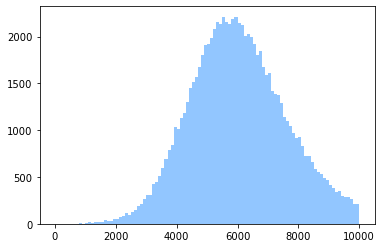

In [100]:
plt.hist(test[0,0].flatten()[test[0,0].flatten() > 0], bins=100,range=(0,1e4));

So the problem is that there's a really striking association that I can detect visually, where the pol2 foci are clearly in low histone regions. But I can't seem to make it come out of these pixel correlation analyses. I'm not trying to whip the data — if the relationship isn't there it isn't there — but I believe it's real and want to find a way to see it. There just seems to be a quite obvious negative (though imperfect) correlation between Rpb1 signal and histone signal which is not apparent for Zelda. I wonder about trying a different tactice and trying to segment the Rpb1 clusters some...

Going to use a single 2D image as a test.

In [155]:
testp = rpb06[0,0,4]
testh = rpb06[1,0,4]
testmask = mask_rpb06[0,4].astype(bool)
testp = np.where(testmask, testp, 0)
testh = np.where(testmask, testh, 0)
viewer([testp, testh], 4)

interactive(children=(Dropdown(description='Color', index=6, options=('prism', 'gray_r', 'plasma', 'inferno', …

In [150]:
testmask.shape

(357, 542)

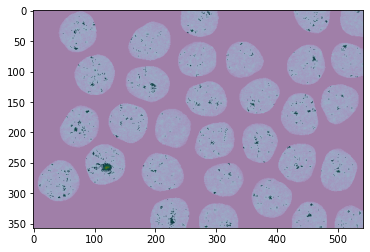

In [156]:
p = 99
t = np.percentile(testp.flatten(), p)
hubs = np.where(testp > t, 1, 0).astype('bool')
plt.imshow(testp)
plt.imshow(hubs, cmap="gray_r", alpha=0.5)

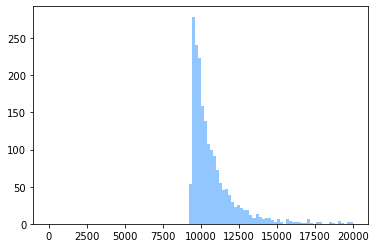

In [157]:
plt.hist(testp[hubs], range=(0,2e4), bins=100);

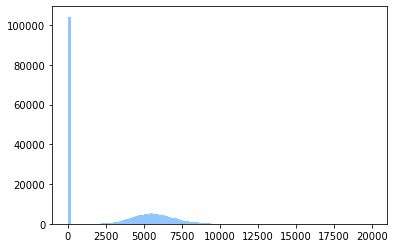

In [160]:
plt.hist(testp[~hubs], range=(0,2e4), bins=100);

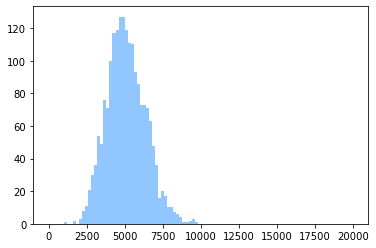

In [161]:
#top 99 percent.
plt.hist(testh[hubs], range=(0,2e4), bins=100);

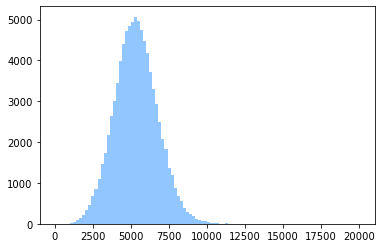

In [169]:
p1 = 0
p2 = 99
t1 = np.percentile(testp.flatten(), p1)
t2 = np.percentile(testp.flatten(), p2)
comp = np.where((testp > t1) & (testp < t2), True, False)
plt.hist(testh[comp], range=(0,2e4), bins=100);

In [170]:
np.mean(testp[hubs])

10845.533885152612

In [174]:
np.mean(testp[comp])

5672.278537506437

In [175]:
np.mean(testh[hubs])

5111.444904293844

In [176]:
np.mean(testh[comp])

5323.865835097557

In [179]:
viewer([np.where(~hubs, testh, 0), np.where(hubs, testh, 0)])

interactive(children=(Dropdown(description='Color', index=6, options=('prism', 'gray_r', 'plasma', 'inferno', …

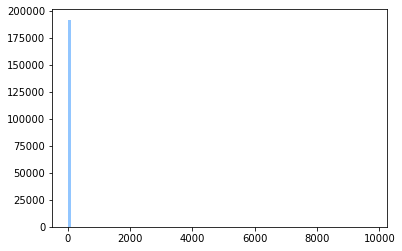

In [182]:
plt.hist(np.where(hubs, testh, 0).flatten(), bins=100);

In [212]:
a1 = testh[hubs]
#a2 = a1[testmask]
np.percentile(a1, 99)


7205.2

In [203]:
a2 = testh[~hubs & testmask]

In [214]:
np.percentile(a2, 99)

8831.23999999999

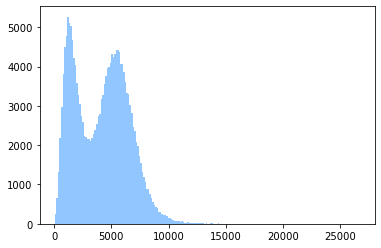

In [218]:
plt.hist(rpb06[0,0,4].flatten(), bins=200);

p = 99
t = np.percentile(testp[testmask].flatten(), p)
hubs = np.where(testp > t, 1, 0).astype('bool')
plt.imshow(testp)
plt.imshow(hubs, cmap="gray_r", alpha=0.5)

0.0018136629273863103


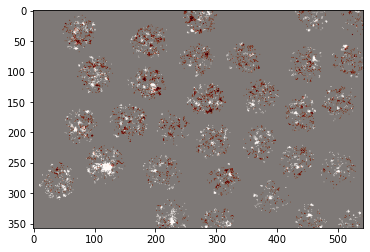

In [252]:
def overlap(im1, im2, mask, p=90):
    t1 = np.percentile(im1[mask].flatten(), p)
    hubs1 = np.where(im1 > t1, 1, 0).astype('bool')
    t2 = np.percentile(im2[mask].flatten(), p)
    hubs2 = np.where(im2 > t2, 1, 0).astype('bool')
    plt.imshow(hubs1, cmap="gray", alpha=1)
    plt.imshow(hubs2.astype('bool'), cmap="Reds", alpha=0.5)
    over = np.count_nonzero(hubs1 & hubs2)
    #total = np.mean((np.count_nonzero(hubs1), np.count_nonzero(hubs1)))
    total = np.count_nonzero(mask)
    print(over / total)
    
overlap(testp, testh, testmask, 95)

I'm just so perplexed! I do not think I am deceiving myself but I can't get what I see by eye to show up quantitatively. The movies I am comparing are 08 from Zld and 06 from Rpb1. Comparing these two movies, it seems clear that the Rpb1 foci essentially never overlap with the dense histone regions, while they occasionally do in the Zelda data. But every attempt I make to recover this in pixel correlations seems to fail. Three possibilities remain: 1) I'm just totally fooling myself and there is no association at all, 2) there is an anti-correlation in Rpb1 and histone signal but I haven't run the right analysis of it, and 3)there is not Rpb1-histone association, but rather my 'control' data has a real positive correlation of Zelda and Histone. 

I'll try to run the above on Zelda.

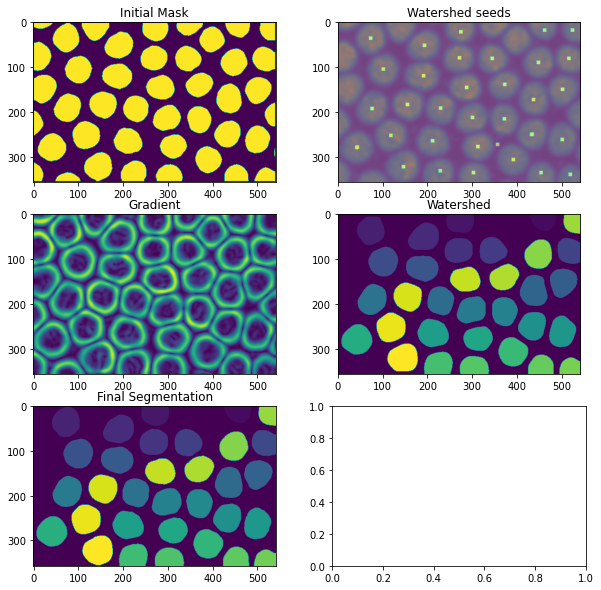

In [291]:
# Start fresh, select individual 2D slices from rpb1 and Zld
rpb06 = read_czi('/Users/michaelstadler/Bioinformatics/Projects/rpb1/data/20201021-rpb1-hisrfp-em2-zsmv-06.czi')
rpb06 = rpb06[:,0:20]
his_channel = 1
pol_channel = 0
frame = 0
slice_ = 4

seed_window=(20,100,100)
size_min=3000
size_max=50000

def slice_mask(stack, frame, his_channel, pol_channel, slice_):
    mask = imp.segment_nuclei3D_5(stack[his_channel,frame], seed_window=seed_window, size_min=size_min, display=True)
    mask = mask.astype(bool)
    p = stack[pol_channel, frame, slice_]
    h = stack[his_channel, frame, slice_]
    mf = mask[slice_]
    
    return mask, p, h, mf

mask_rpb06, p_rpb06, h_rpb06, mf_rpb06 = slice_mask(rpb06, 0, his_channel, pol_channel, slice_)
#viewer(mask)

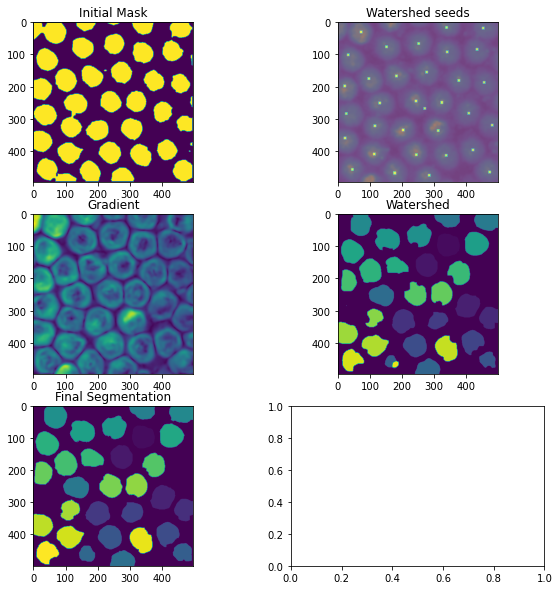

In [292]:
z08 = read_czi('/Users/michaelstadler/Bioinformatics/Projects/rpb1/data/mNeonGreen_Zld_HisRFP_em1-08.czi')
his_channel = 0
pol_channel = 1
frame = 3
slice_ = 6

seed_window=(20,100,100)
size_min=3000
size_max=50000

mask_z08, p_z08, h_z08, mf_z08 = slice_mask(z08, 0, his_channel, pol_channel, slice_)
#viewer(mask)

In [298]:
def pltscat(im1, im2, mask, samplesize=5000, alpha=0.5):
    im1_s = ndi.gaussian_filter(im1, sigma=0.5)
    im2_s = ndi.gaussian_filter(im2, sigma=0.5)
    x = np.random.choice(im1_s[mask], samplesize)
    y = np.random.choice(im2_s[mask], samplesize)
    plt.scatter(x, y, alpha=alpha)

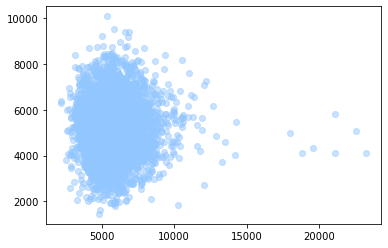

In [299]:
pltscat(p_rpb06, h_rpb06, mf_rpb06)

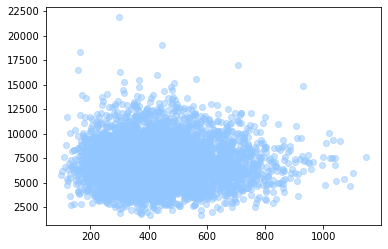

In [300]:
pltscat(p_z08, h_z08, mf_z08)

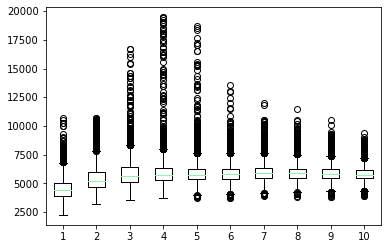

In [355]:
def pltquantiles(im1_in, im2_in, mask, sigma=0.5):
    im1 = ndi.gaussian_filter(im1_in, sigma=sigma)
    im2 = ndi.gaussian_filter(im2_in, sigma=sigma)
    
    pix_l = []
    min_l = np.inf
    for i in range(0, 100, 10):
        lower = np.percentile(im1[mask], i)
        upper = np.percentile(im1[mask], i+10)
        pix = np.where((im1 >= lower) & (im1 <= upper), im2, -1)
        pix = pix[mask]
        pix = pix[pix > -1]
        pix_l.append(pix)
        if (len(pix) < min_l):
            min_l = len(pix)
    
    pix_a = np.ndarray((min_l, 10))
    for i in range(0, len(pix_l)):
        pix_a[:,i] = pix_l[i][0:min_l]
        
    plt.boxplot(pix_a)
    #plt.violinplot(pix_a)
    
pltquantiles(h_rpb06, p_rpb06, mf_rpb06, 2)

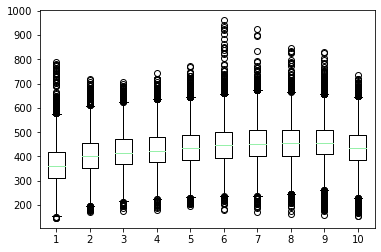

In [351]:
pltquantiles(h_z08, p_z08, mf_z08, 2)

Now __this__ is what I'm talking about. I worry a bit that it's just the HLB in that one nucleus. It seems from perusing in imageJ that this isn't the case — there are minor foci that have peak intensities over 11-12,000. Anyway, the best way to handle that would be to use more than single 2D images. The HLB is a real problem and will be. I know from experience that it can be effectively segmented out, but I think for now I may content myself to just using higher Z slices that mostly exclude it. I'll do it as a wrapper for the code I just wrote.

In [416]:
def slice_mask(stack, frame, his_channel, pol_channel, slice_, seed_window=(20,100,100), size_min = 3000, size_max=50000, display=False):
    """Performs nuclear segmentation on a frame, extracts indicated slice."""
    mask = imp.segment_nuclei3D_5(stack[his_channel,frame], seed_window=seed_window, size_min=size_min, size_max=size_max, display=display)
    mask = mask.astype(bool)
    p = stack[pol_channel, frame, slice_]
    h = stack[his_channel, frame, slice_]
    mf = mask[slice_]
    
    return mask, p, h, mf

def quantile_sig2D(im1_in, im2_in, mask, sigma=0.5):
    """Gets pixel values in im2 for pixel quantiles in im1"""
    im1 = ndi.gaussian_filter(im1_in, sigma=sigma)
    im2 = ndi.gaussian_filter(im2_in, sigma=sigma)
    
    pix_l = []
    min_l = np.inf
    for i in range(0, 100, 10):
        lower = np.percentile(im1[mask], i)
        upper = np.percentile(im1[mask], i+10)
        pix = np.where((im1 >= lower) & (im1 <= upper), im2, -1)
        pix = pix[mask]
        pix = pix[pix > -1]
        pix_l.append(pix)
        if (len(pix) < min_l):
            min_l = len(pix)
    
    pix_a = np.ndarray((min_l, 10))
    for i in range(0, len(pix_l)):
        pix_a[:,i] = pix_l[i][0:min_l]
    return pix_a

def bleach_corr(instack):
    """Simple bleach correction of a 2-channel 5D stack"""
    stack = instack.copy()
    for c in range(0, 2):
        c_mean = np.mean(instack[c])
        for f in range(0, instack.shape[1]):
            f_mean = np.mean(instack[c, f])
            stack[c,f] = stack[c,f] * c_mean / f_mean
    return stack


def quantile_sig_2Dt(instack, his_channel, p_channel, frame_start, frame_end, slice_, 
                     seed_window=(20,100,100), size_min = 3000, size_max=50000, sigma=0.5):
    """Wrapper to apply the above functions to multiple frames. Still for a single slice."""
    stack = instack.copy()[:,frame_start:(frame_end+1)]
    stack = bleach_corr(stack)
    pix = np.empty((0,10))
    for f in range(0, stack.shape[1]):
        mask, p, h, mf = slice_mask(stack, f, his_channel, p_channel, slice_, seed_window=seed_window, size_min=size_min, size_max=size_max)
        pix = np.vstack([pix , quantile_sig2D(h, p, mf, sigma)])
    
    return pix

pix = quantile_sig_2Dt(rpb06,his_channel=1, p_channel=0, frame_start=0, frame_end=5, slice_=4, sigma=2)  


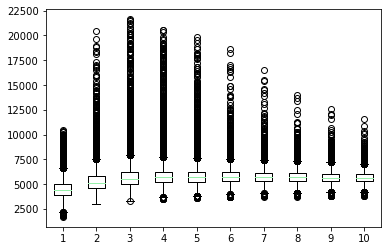

In [417]:
plt.boxplot(pix);

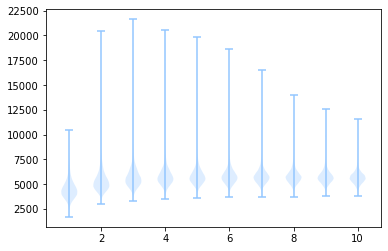

In [418]:
plt.violinplot(pix);

In [419]:
pix_z = quantile_sig_2Dt(z08,his_channel=0, p_channel=1, frame_start=0, frame_end=5, slice_=4, sigma=2)  

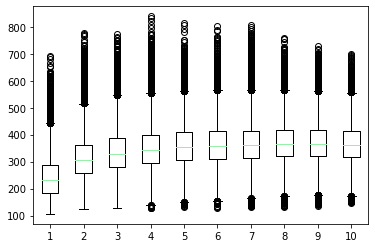

In [420]:
plt.boxplot(pix_z);

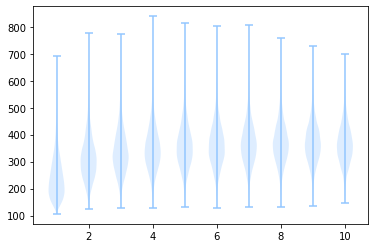

In [421]:
plt.violinplot(pix_z);

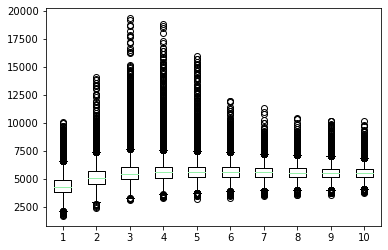

In [423]:
# Testing excluding the first few frames.
pix3 = quantile_sig_2Dt(rpb06,his_channel=1, p_channel=0, frame_start=3, frame_end=7, slice_=4, sigma=2)  
plt.boxplot(pix3);

### Conclusions

This now seems convincing to me. It's consistent with more data. I'd like to see take more of this data for Zelda (and equivalent data at that) but I don't have the flies right now. I'll get to work on making them but it's an interesting phenomenon. Moreover, this is an interesting analysis framework for other kinds of blob analysis.

I showed some of the this in lab meeting to a pretty good reception. Mike had an interesting idea to try using machine learning to predict the Rpb1 signal from histone (more of genomics -> imaging). I think that's quite an interesting idea, and certainly a useful thing to perhaps get started learning and working on. I also like the genomics analog of the idea of inferring hidden underlying states, especially if we could get multiple colors going. 

The idea was to make it a vector problem, where each pixel gets a number of values (I think these would essentially be the original pixel value and then the outputs of various filters in order to capture local information).